# Notebook 03: Modeling & Evaluation

This notebook focuses on building and evaluating machine learning models to predict customer churn.

### Objectives of This Notebook:
- Train baseline and advanced classifiers
- Evaluate model performance using classification metrics and ROC AUC
- Compare models visually using confusion matrices and ROC curves

### Step 1: Import Libraries
We load classification models and evaluation tools from `sklearn`, `matplotlib`, and `seaborn` to help with visualizing performance.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load Cleaned Training Data
These are the files we exported from Notebook 02. We will train our models on this preprocessed data.

In [2]:
X_train = pd.read_csv("../data/X_train_clean.csv")
X_test = pd.read_csv("../data/X_test_clean.csv")
y_train = pd.read_csv("../data/y_train_clean.csv").squeeze()
y_test = pd.read_csv("../data/y_test_clean.csv").squeeze()

### Step 3: Logistic Regression (Baseline Model)
We start with a simple interpretable model as a baseline. This helps us evaluate whether more complex models offer real gains.

In [3]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

In [4]:
print("--- Logistic Regression Report ---")
print(classification_report(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_prob_logreg))

--- Logistic Regression Report ---
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.52      0.81      0.63       325

    accuracy                           0.85      2026
   macro avg       0.74      0.83      0.77      2026
weighted avg       0.89      0.85      0.86      2026

ROC AUC: 0.9164654275765387


The Logistic Regression model shows solid baseline performance:
- Accuracy: **85%**
- Recall for churn class: **81%** — this indicates a strong ability to capture actual churners.
- ROC AUC: With a score of **0.9165**, it shows good overall separation between churners and non-churners.

However, the lower precision **(52%)** for churn indicates a higher false positive rate. There's room to improve precision and overall balance with a more flexible model.

### Step 5: Random Forest Classifier
Now we train a more powerful ensemble model to see if it improves predictive performance.

In [5]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

### Step 6: Random Forest Results
We compare precision, recall, and ROC AUC to the Logistic Regression baseline.

In [6]:
print("\n--- Random Forest Report ---")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


--- Random Forest Report ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1701
           1       0.93      0.75      0.83       325

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026

ROC AUC: 0.9857459413014968


The Random Forest model improves on nearly every metric:
- Accuracy: **95%**
- Recall for churn class: **75%** — slightly lower than Logistic, but balanced by higher precision at **93%**.
- ROC AUC: With a score of **0.9857**, it demonstrates excellent ability to separate the two classes.

These results suggest Random Forest is a strong candidate for business deployment, offering both precision and overall reliability.

### Step 7: Confusion Matrix
This visual helps us understand the balance between false positives and false negatives, which is critical for churn mitigation.

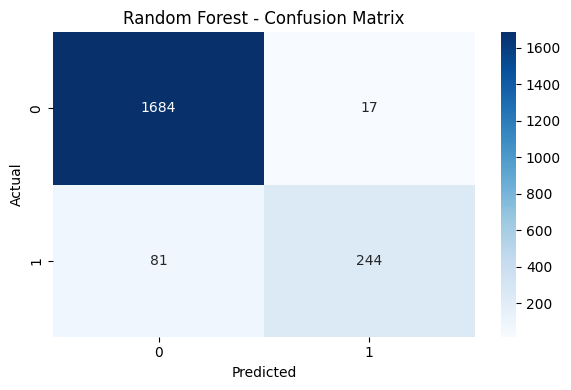

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The confusion matrix gives us a visual summary of predictions:
- True Positives (churn correctly identified): 244
- True Negatives (loyal customers correctly retained): 1684
- False Positives: 17
- False Negatives: 81

This balance is solid, indicating we catch most churners while minimizing unnecessary outreach to loyal users.


### Step 8: ROC Curve Comparison
We compare model sensitivity (true positive rate) across thresholds to visualize overall performance.

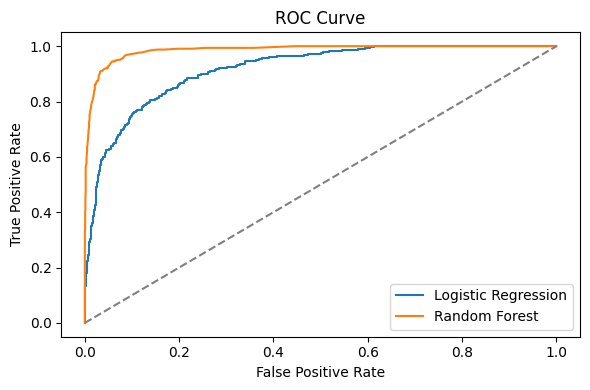

In [8]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

The ROC curve provides a visual comparison of classifier performance:
- Logistic Regression AUC: **0.9165**
- Random Forest AUC: **0.9857**

The Random Forest ROC curve consistently outperforms, indicating superior discrimination between churn and non-churn cases at nearly every threshold.

### Step 9: Summary & Next Steps

We were able to build and evaluate two machine learning models to predict customer churn:
- A baseline Logistic Regression model, which offered solid performance and strong recall for the minority class
- A more advanced Random Forest model, which achieved significantly higher performance across all metrics, especially ROC AUC **(~0.99)**

We also visualized performance using ROC curves and confusion matrices, confirming that the Random Forest model is well-suited for identifying at-risk customers in an imbalanced classification setting.

In Notebook 04, we’ll: 

- Shift our focus from performance to interpretation by analyzing the most important features driving churn predictions.
- Our goal will be to summarize key findings and translate those insights into actionable business recommendations.